
# Exploratory Data Analysis for Supermarket Sales
### **Creator: Qurat Ul Ain**

Perform an analysis on the Supermarket Sales dataset and identify purchasing behaviors of customers. This analysis should involve defining relevant metrics, such as total sales and drivers of sales, as well as determining the sources of the highest sales. It is recommended to explore the data thoroughly, and to create charts and graphs to visualize any interesting trends and insights discovered.


After analyzing the data, conduct a deeper examination of customer segments and determine recommendations based on the insights obtained. This will involve defining which segments the company should target to increase sales and improve overall performance.


## Dataset info:

###Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

###Attribute information

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


Dataset link: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales


##Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, timedelta, datetime


## Data Collection

In [7]:
def collect_data():
  data= pd.read_csv('/content/drive/MyDrive/data_science/ML/customer EDA/supermarket_sales.csv')
  data.columns= data.columns.str.replace(' ', '_')
  return data	

In [8]:
data= collect_data()
data.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [10]:
data.describe()

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
data['Product_line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64

In [12]:
data.keys()

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

##Categorise Numeric and Categorical Data

In [13]:
data_numerics = data.select_dtypes(include=np.number)
data_cat = set(data.columns) - set(data_numerics)
print("Numeric Columns:\n",list(data_numerics))
print("Categorical Columns:\n",data_cat)

Numeric Columns:
 ['Unit_price', 'Quantity', 'Tax_5%', 'Total', 'cogs', 'gross_margin_percentage', 'gross_income', 'Rating']
Categorical Columns:
 {'Customer_type', 'Gender', 'Invoice_ID', 'City', 'Product_line', 'Branch', 'Date', 'Time', 'Payment'}


In [14]:
date = pd.to_datetime(data["Date"], format='%m/%d/%Y').dt.date
data[['Date']] = data[['Date']].apply( lambda x: pd.to_datetime(x, format='%m/%d/%Y').dt.date)

In [15]:
print ('After  converting : ' ,data['Date'].dtypes)

After  converting :  object


In [16]:
data['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
995    2019-01-29
996    2019-03-02
997    2019-02-09
998    2019-02-22
999    2019-02-18
Name: Date, Length: 1000, dtype: object

In [17]:
data['Date']=pd.to_datetime(data['Date'], format='%Y-%m-%d')
print ('After  converting : ' ,data['Date'].dtypes)

After  converting :  datetime64[ns]


In [18]:
data['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

##Exploratory  Data Analysis

In [ ]:
# Create a new dataframe which contains the total sale for each date

tot_sales = pd.pivot_table(data, values = 'Total', index = 'Date', aggfunc = 'sum')
tot_sales.head()

,Total
Date,
2019-01-01,4745.1810
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835


In [ ]:
sales_per_prod =data.groupby(by=["Product_line"]).sum()[["Total"]].sort_values(by="Total") 
sales_per_prod

<ipython-input-119-e9ed6ff83202>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_per_prod =data.groupby(by=["Product_line"]).sum()[["Total"]].sort_values(by="Total")


,Total
Product_line,
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Fashion accessories,54305.8950
Electronic accessories,54337.5315
Sports and travel,55122.8265
Food and beverages,56144.8440


In [ ]:
sales_per_qty =data.groupby(by=["Date"]).sum()[["Quantity"]].sort_values(by="Quantity") 
sales_per_qty

<ipython-input-154-becbd13cffe6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_per_qty =data.groupby(by=["Date"]).sum()[["Quantity"]].sort_values(by="Quantity")


,Quantity
Date,
2019-02-21,18
2019-02-18,24
2019-03-18,27
2019-02-28,30
2019-02-13,31
...,...
2019-03-09,99
2019-03-05,103
2019-02-15,106


In [ ]:
tot_sales = int(data["Total"].sum())
avg_rating = round(data["Rating"].mean(),1)
star_rate = ":star:" * int(round(avg_rating,0))
avg_slaes_by_transcation = round(data["Total"].mean(),2)

tot_income = int(data["gross_income"].sum())
prod = (data["Product_line"].count())
qty = int(data["Quantity"].sum())

print("tot_sales: ",tot_sales )
print('\n'"avg_rating: ",avg_rating )
print('\n'"avg_slaes_by_transcation: ",avg_slaes_by_transcation )
print('\n'"tot_income: ",tot_income )
print('\n'"prod categories: ",prod )
print('\n'"Sold qty: ",qty )

tot_sales:  322966

avg_rating:  7.0

avg_slaes_by_transcation:  322.97

tot_income:  15379

prod categories:  1000

Sold qty:  5510


###Missing Values

In [ ]:
print('Missing value: ------------- ')
print(data.isnull().sum())

Missing value: ------------- 
Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64


*NOTE: No missing value*

In [19]:
sales_by_month= data.groupby(data['Date'].dt.strftime('%B'))['Total'].sum().sort_values()
sales_by_month


Date
February     97219.374
March       109455.507
January     116291.868
Name: Total, dtype: float64

In [20]:
# Calculate total sales for each branch & city
branch_sales = data.groupby('Branch')['Total'].sum()
city_sales = data.groupby('City')['Total'].sum()

print('Sales trends by branch:\n', branch_sales)
print('\nSales trends by city:\n', city_sales)

Sales trends by branch:
 Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

Sales trends by city:
 City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


##EDA


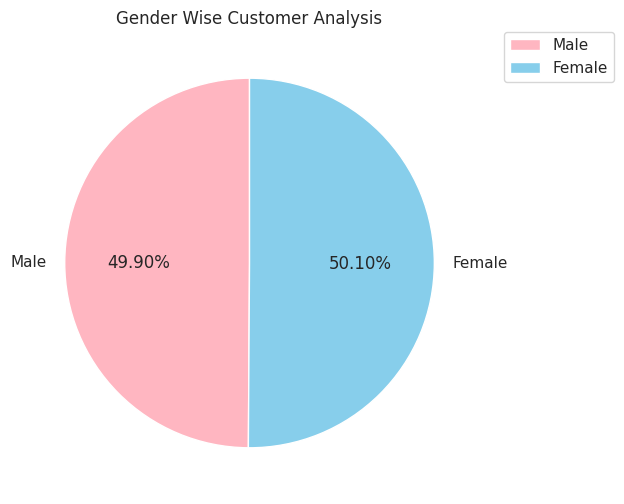

In [99]:
plt.figure(figsize=(6, 6))
target = [len(data.query("Gender == 'Male' ")), len(data.query("Gender == 'Female'"))]
labels = ["Male", "Female"]
plt.pie(x=target, labels=labels, colors=['lightpink', 'skyblue','C1'], autopct='%1.2f%%', shadow=False, startangle=90,)
plt.title("Gender Wise Customer Analysis")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()
plt.show()

Branch
A    32.882757
B    32.881921
C    34.235322
Name: Total, dtype: float64


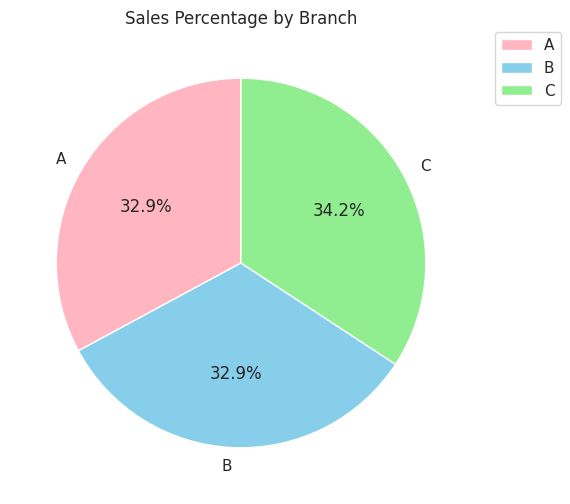

In [101]:
# Calculate the sales percentage for each branch
sales_by_branch = data.groupby('Branch')['Total'].sum()
sales_percent_by_branch = sales_by_branch / sales_by_branch.sum() * 100
print(sales_percent_by_branch)


plt.figure(figsize=(6, 6))
target =  sales_percent_by_branch.tolist()
labels = sales_percent_by_branch.index.tolist()
plt.pie(x=target, labels=labels, colors=['lightpink', 'skyblue','lightgreen'], autopct='%1.1f%%', shadow=False, startangle=90,)
plt.title("Sales Percentage by Branch")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()



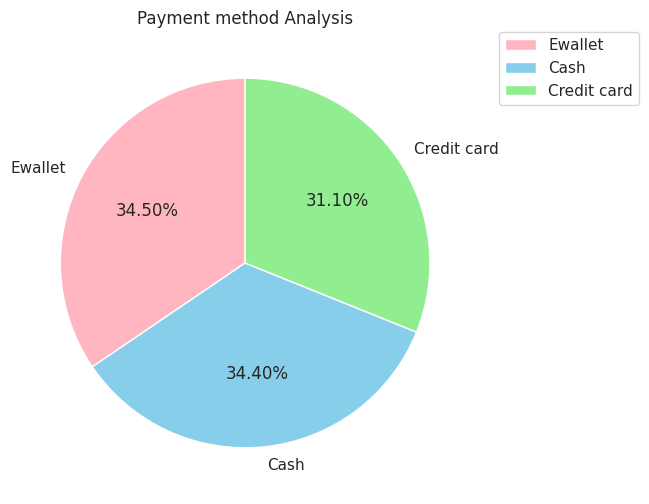

In [102]:
plt.figure(figsize=(6, 6))
target =  data["Payment"].value_counts()
labels = data["Payment"].value_counts().index
plt.pie(x=target, labels=labels, colors=['lightpink', 'skyblue','lightgreen'], autopct='%1.2f%%', shadow=False, startangle=90,)
plt.title("Payment method Analysis")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

Date
February     97219.374
March       109455.507
January     116291.868
Name: Total, dtype: float64


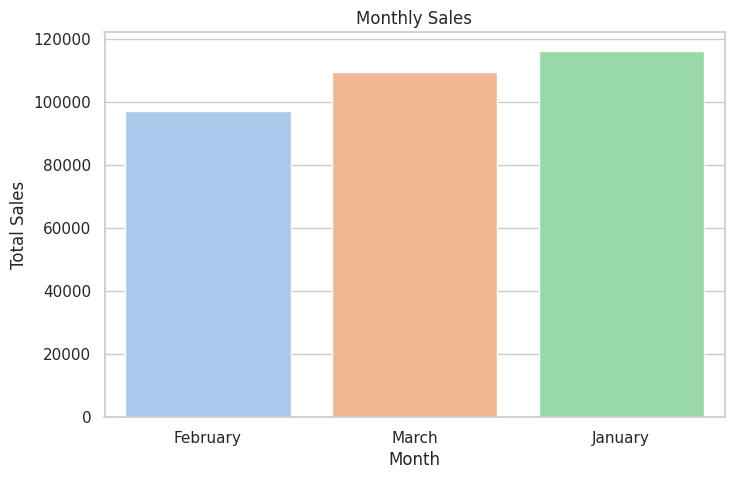

In [ ]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

#data['Month'] = data['Date'].dt.month
sales_by_month= data.groupby(data['Date'].dt.strftime('%B'))['Total'].sum().sort_values()
sales_by_month
print(sales_by_month)

plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
ax.set(xlabel='Month', ylabel='Total Sales', title='Monthly Sales')

plt.show()

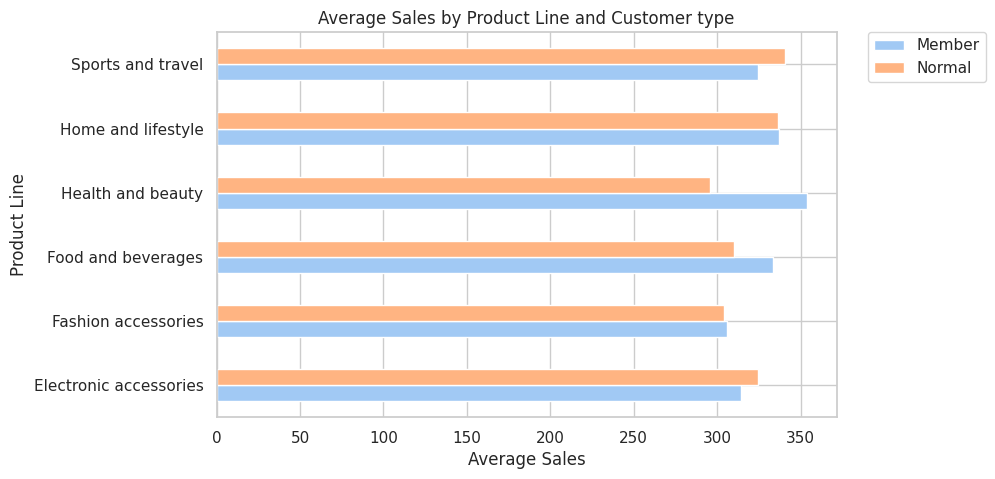

In [105]:
# group data by product line, gender and customer type, and calculate total and mean sales
grouped_sales = pd.DataFrame(data.groupby(["Product_line","Customer_type"])["Total"].agg(["sum", "mean"]))


avg_sales = grouped_sales["mean"].unstack()

avg_sales.plot(kind='barh', figsize=(8,5))
sns.set_theme(style="whitegrid", palette="pastel")
plt.title('Average Sales by Product Line and Customer type')
plt.xlabel('Average Sales')
plt.ylabel('Product Line')
plt.legend(title='Customer type')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()


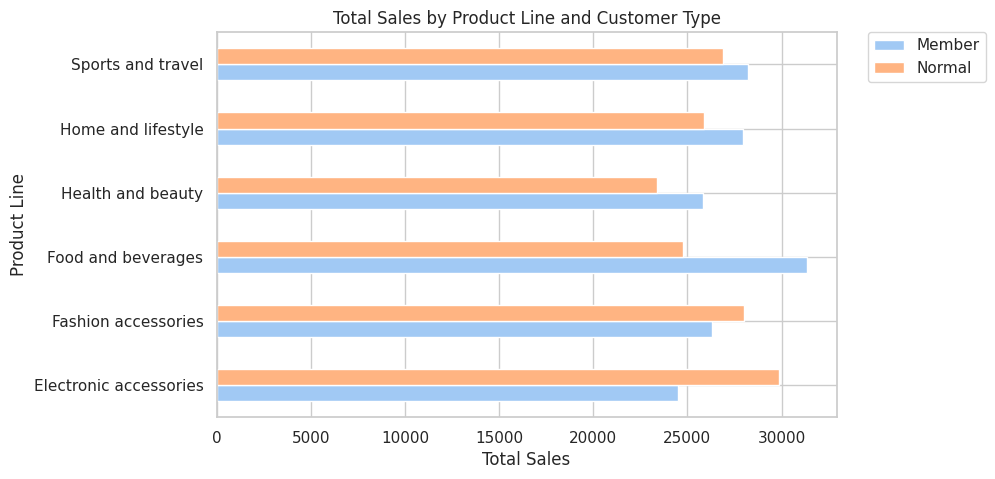

In [104]:
total_sales = grouped_sales["sum"].unstack()
total_sales.plot(kind='barh', figsize=(8,5))
plt.title('Total Sales by Product Line and Customer Type')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.legend(title='Customer Type')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

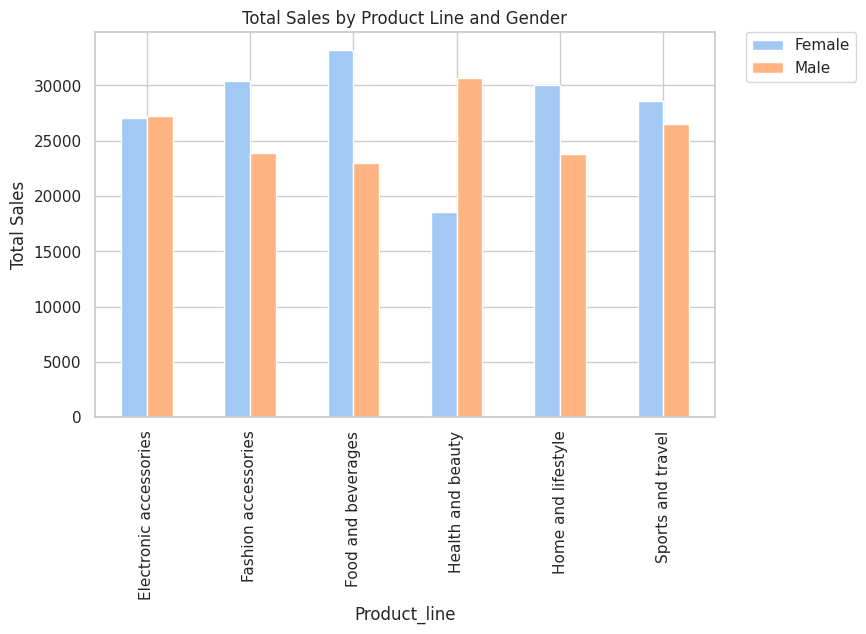

In [124]:
# group data by product line, gender and customer type, and calculate total and mean sales
grouped_sales = pd.DataFrame(data.groupby(["Product_line","Gender"])["Total"].agg(["sum", "mean"]))

total_sales_grouped = grouped_sales['sum'].unstack()
ax = total_sales_grouped.plot(kind='bar', figsize=(8, 5))
sns.set_theme(style="whitegrid", palette="pastel")
ax.set_xlabel('Product_line')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Product Line and Gender')
ax.legend(title='Product_line')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()


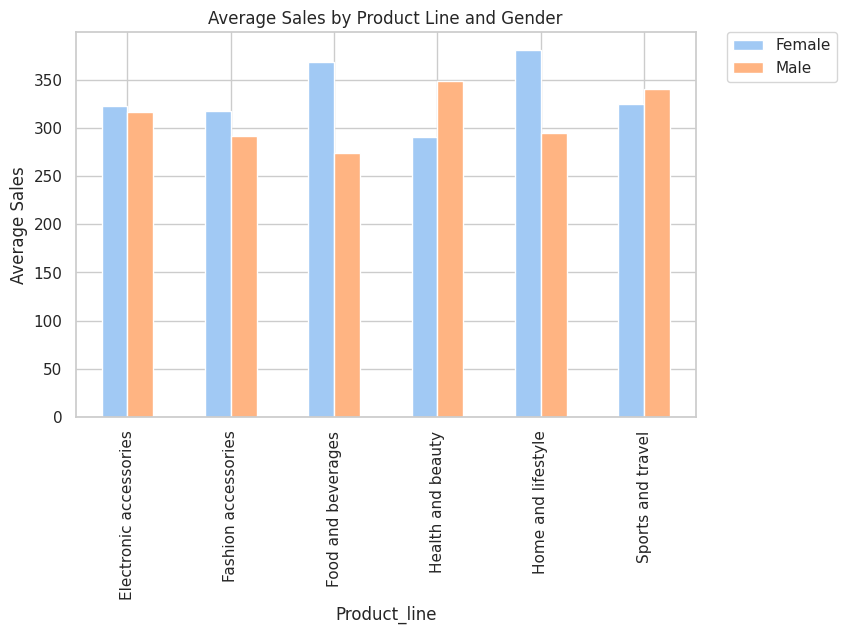

In [123]:
grouped_sales = pd.DataFrame(data.groupby(["Product_line","Gender"])["Total"].agg(["sum", "mean"]))
avg_sales_grouped = grouped_sales['mean'].unstack()
ax = avg_sales_grouped.plot(kind='bar', figsize=(8, 5))
sns.set_theme(style="whitegrid", palette="pastel")
ax.set_xlabel('Product_line')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by Product Line and Gender')
ax.legend(title='Product_line')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

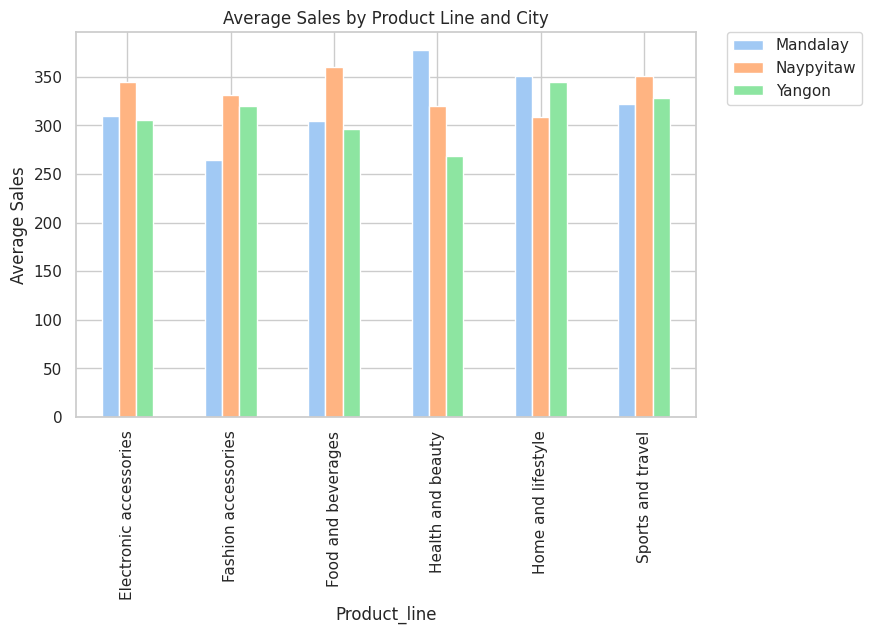

In [109]:
grouped_sales = pd.DataFrame(data.groupby(["Product_line","City"])["Total"].agg(["sum", "mean"]))
avg_sales_grouped = grouped_sales['mean'].unstack()
ax = avg_sales_grouped.plot(kind='bar', figsize=(8, 5))
sns.set_theme(style="whitegrid", palette="pastel")
ax.set_xlabel('Product_line')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by Product Line and City')
ax.legend(title='City')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

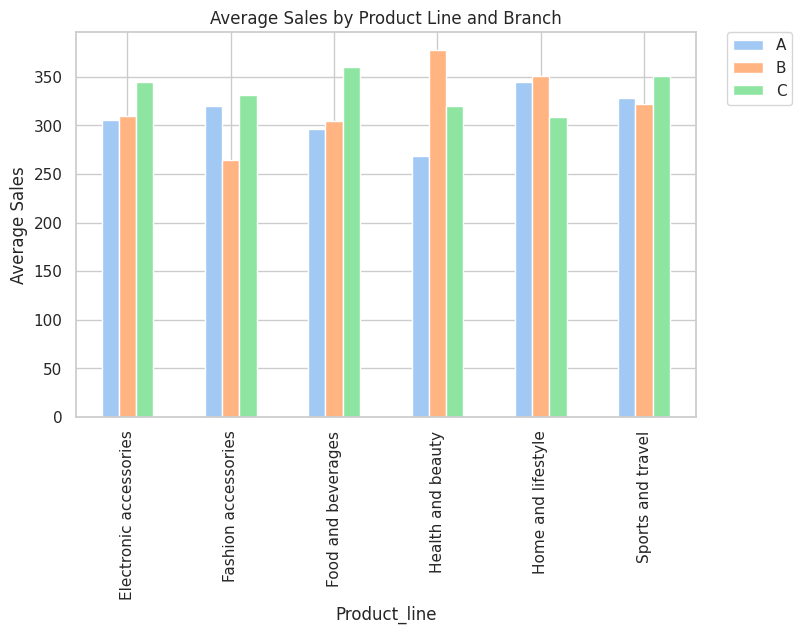

In [110]:
grouped_sales = pd.DataFrame(data.groupby(["Product_line","Branch"])["Total"].agg(["sum", "mean"]))
avg_sales_grouped = grouped_sales['mean'].unstack()
ax = avg_sales_grouped.plot(kind='bar', figsize=(8, 5))
sns.set_theme(style="whitegrid", palette="pastel")
ax.set_xlabel('Product_line')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales by Product Line and Branch')
ax.legend(title='Branch')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.show()

##Ratings



Product_line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


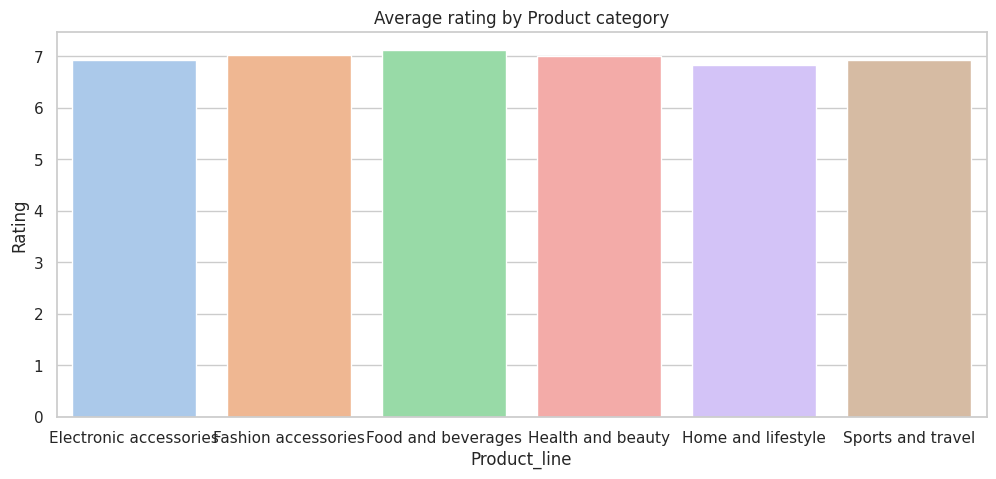

In [ ]:
rating_by_prod= data.groupby(data['Product_line'])['Rating'].mean()
rating_by_prod

# Print the monthly sales
print(rating_by_prod)

plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.barplot(x=rating_by_prod.index, y=rating_by_prod.values)
ax.set(xlabel='Product_line', ylabel='Rating', title='Average rating by Product category')

plt.show()

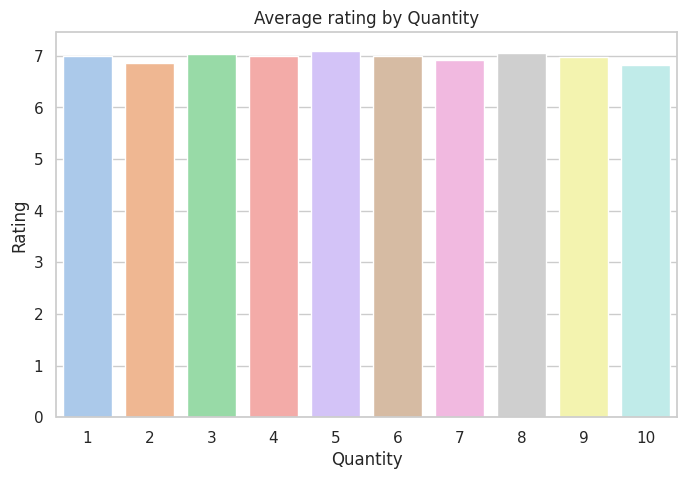

In [ ]:
rating_by_qty= data.groupby(data['Quantity'])['Rating'].mean()
rating_by_qty

plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.barplot(x=rating_by_qty.index, y=rating_by_qty.values)
ax.set(xlabel='Quantity', ylabel='Rating', title='Average rating by Quantity')

plt.show()

##Finding Trends

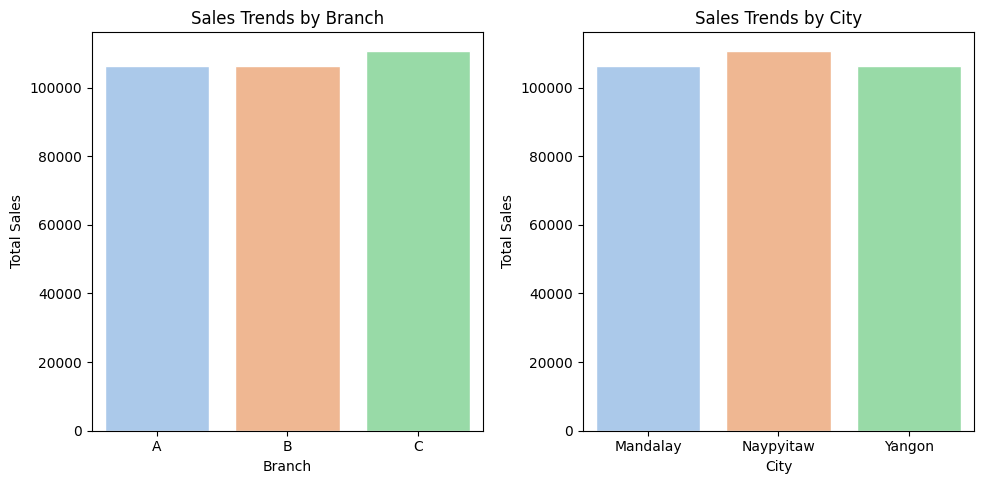

In [21]:
#visualize sales trends by branch and city
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=branch_sales.index, y=branch_sales.values, ax=ax[0])
sns.barplot(x=city_sales.index, y=city_sales.values, ax=ax[1])

ax[0].set_xlabel('Branch')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Sales Trends by Branch')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Total Sales')
ax[1].set_title('Sales Trends by City')

plt.tight_layout()
plt.show()

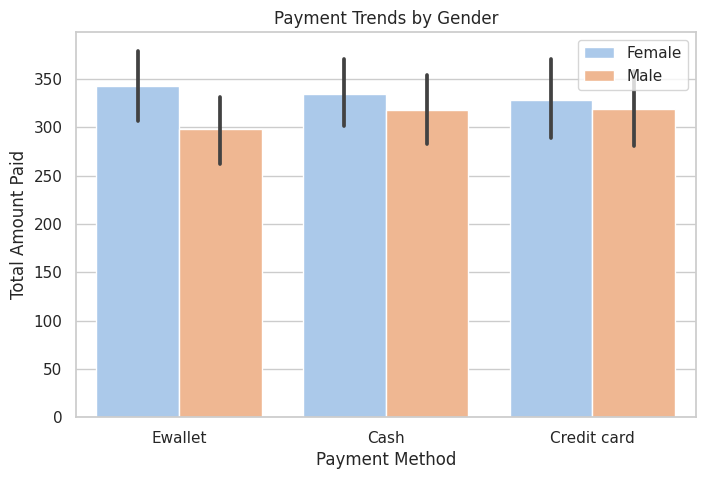

In [26]:
# Create a barplot to visualize payment trends by gender
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x='Payment', y='Total', hue='Gender', data=data)

# Set the title and axes labels
plt.title('Payment Trends by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount Paid')
plt.legend(loc='upper right')
# Show the plot
plt.show()

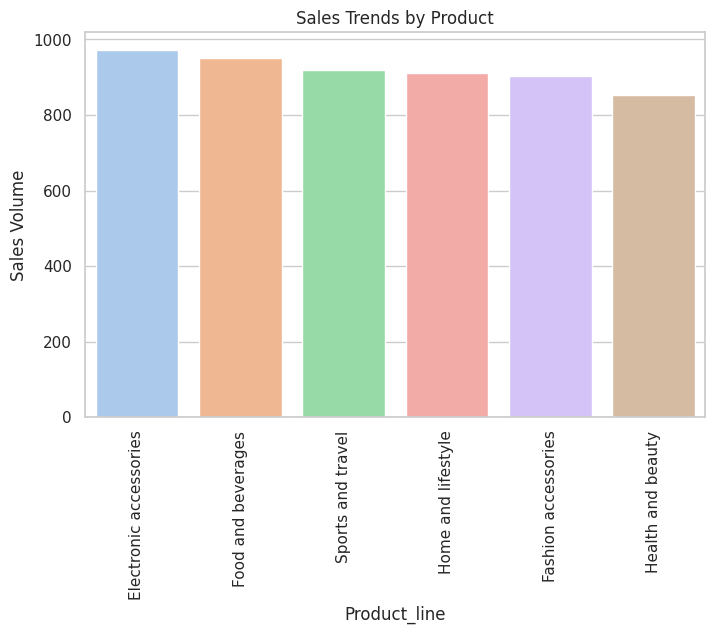

In [ ]:
# Calculate total sales volume and revenue generated for each product
product_sales = data.groupby('Product_line')['Quantity'].sum()
product_revenue = data.groupby('Product_line')['Total'].sum()

# Combine the sales and revenue data into a single DataFrame
product_data = pd.DataFrame({'Sales': product_sales, 'Revenue': product_revenue})

# Sort the data by sales volume in descending order
product_data = product_data.sort_values(by='Sales', ascending=False)

# Visualize the results using a bar plot
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(x=product_data.index, y='Sales', data=product_data)
plt.xticks(rotation=90)
plt.ylabel('Sales Volume')
plt.title('Sales Trends by Product')
plt.show()

##Correlation

<Figure size 800x500 with 0 Axes>

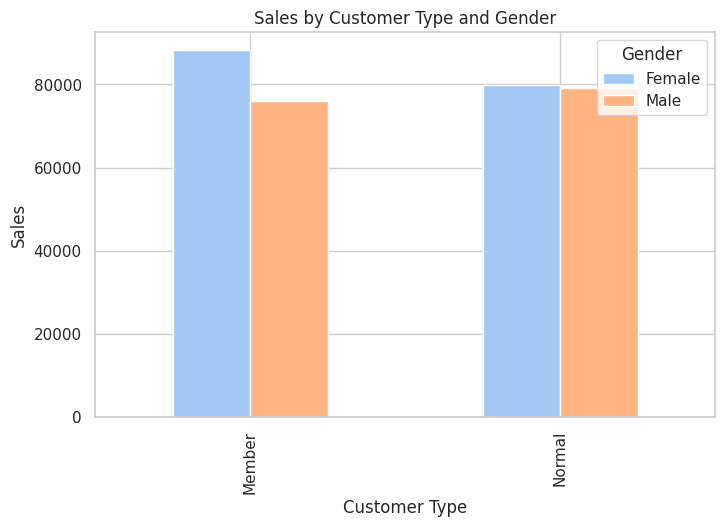

In [23]:
# calculate correlation between customer type and gender
correlation = data.groupby(['Customer_type', 'Gender'])['Total'].sum().unstack()

plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid", palette="pastel")
ax = correlation.plot(kind='bar', figsize=(8,5))
ax.set_xlabel('Customer Type')
ax.set_ylabel('Sales')
ax.set_title('Sales by Customer Type and Gender')
ax.legend(title='Gender', loc='upper right')


plt.show()

Correlation coefficient between price and quantity: 0.01077756434249727


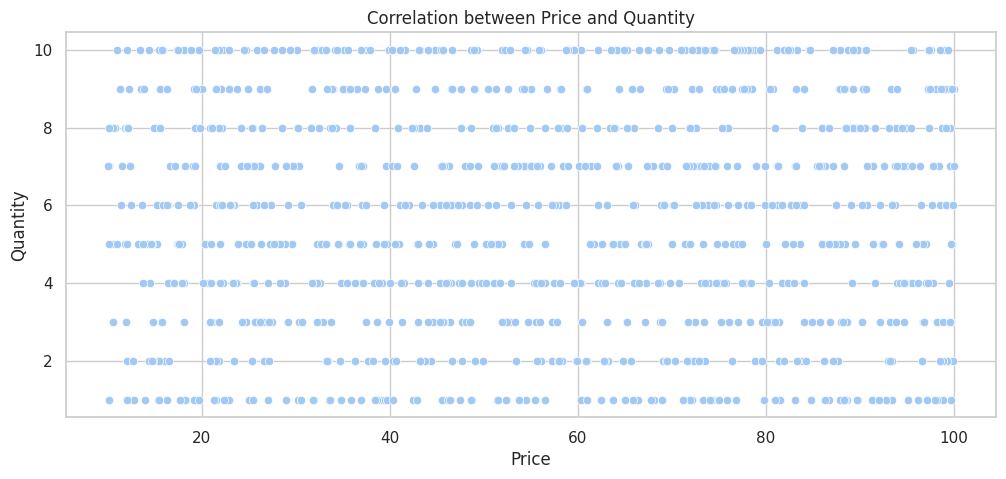

In [ ]:
# Calculate the correlation coefficient between price and quantity
corr = data['Unit_price'].corr(data['Quantity'])
print('Correlation coefficient between price and quantity:', corr)

plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.scatterplot(x='Unit_price', y='Quantity', data=data)

plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Correlation between Price and Quantity')

plt.show()

Correlation coefficient between unit price and tax: 0.633962088589069


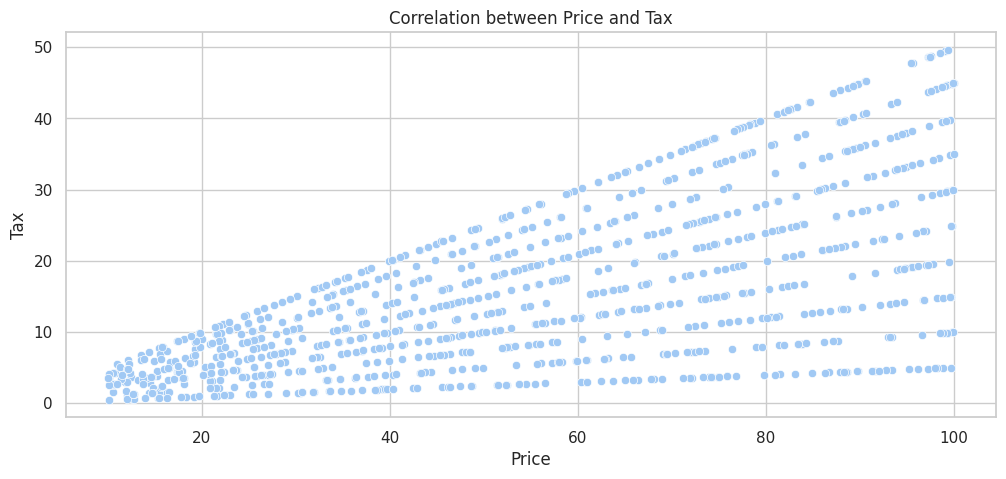

In [ ]:
# Calculate the correlation coefficient between unit price and tax
corr = data['Unit_price'].corr(data['Tax_5%'])
print('Correlation coefficient between unit price and tax:', corr)

plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.scatterplot(x='Unit_price', y='Tax_5%', data=data)

plt.xlabel('Price')
plt.ylabel('Tax')
plt.title('Correlation between Price and Tax')

plt.show()

Correlation coefficient between unit price and Gross income: 0.633962088589069


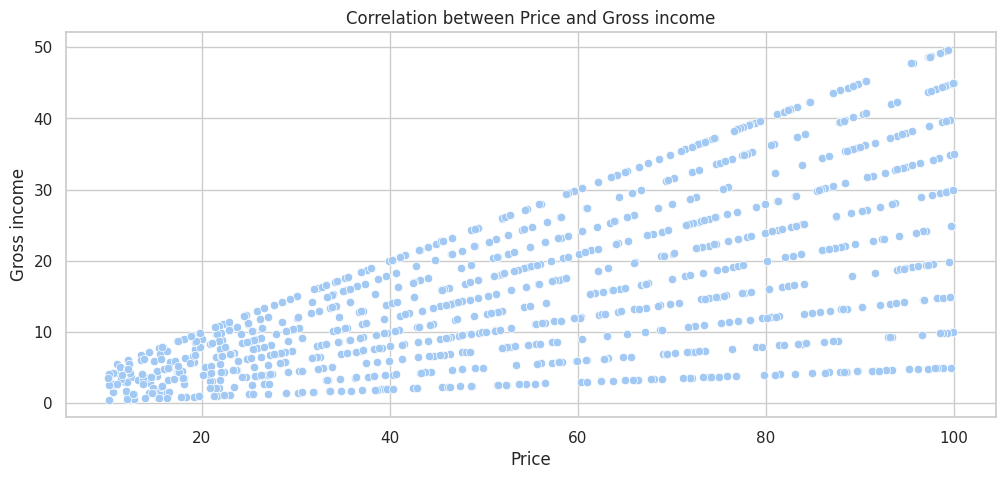

In [ ]:
# Calculate the correlation coefficient between unit price and Gross income
corr = data['Unit_price'].corr(data['gross_income'])
print('Correlation coefficient between unit price and Gross income:', corr)

plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid", palette="pastel")
sns.scatterplot(x='Unit_price', y='gross_income', data=data)

plt.xlabel('Price')
plt.ylabel('Gross income')
plt.title('Correlation between Price and Gross income')

plt.show()


Average correlation coefficient: 0.9999999999999997


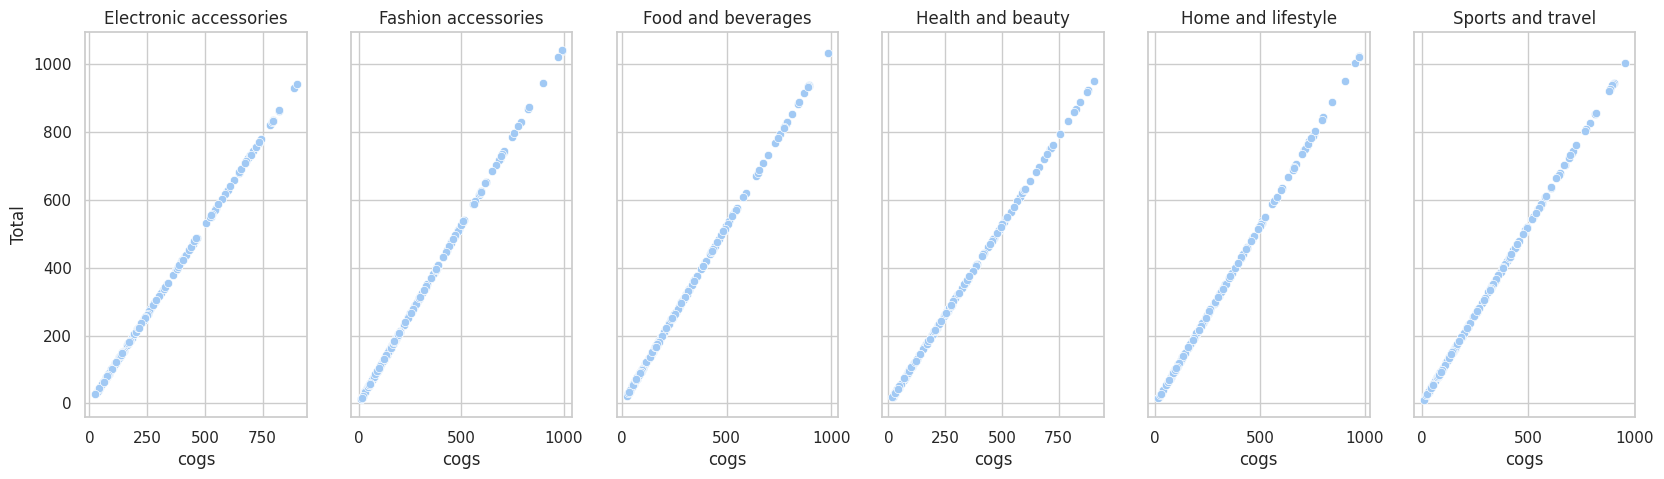

In [127]:
# Group the data by product line
grouped_data = data.groupby('Product_line')

# Calculate the correlation coefficient between COGS and Total for each group
correlations = {}
for name, group in grouped_data:
    corr = group['cogs'].corr(group['Total'])
    correlations[name] = corr

# Calculate the average correlation coefficient across all groups
avg_corr = sum(correlations.values()) / len(correlations)

# Print the results
print('Average correlation coefficient:', avg_corr)

# Create scatter plots to visualize the relationship between COGS and Total for each product line
fig, axs = plt.subplots(ncols=len(grouped_data), figsize=(20, 5), sharey=True)
for i, (name, group) in enumerate(grouped_data):
    axs[i].set_title(name)
    sns.scatterplot(x='cogs', y='Total', data=group, ax=axs[i])
plt.show()

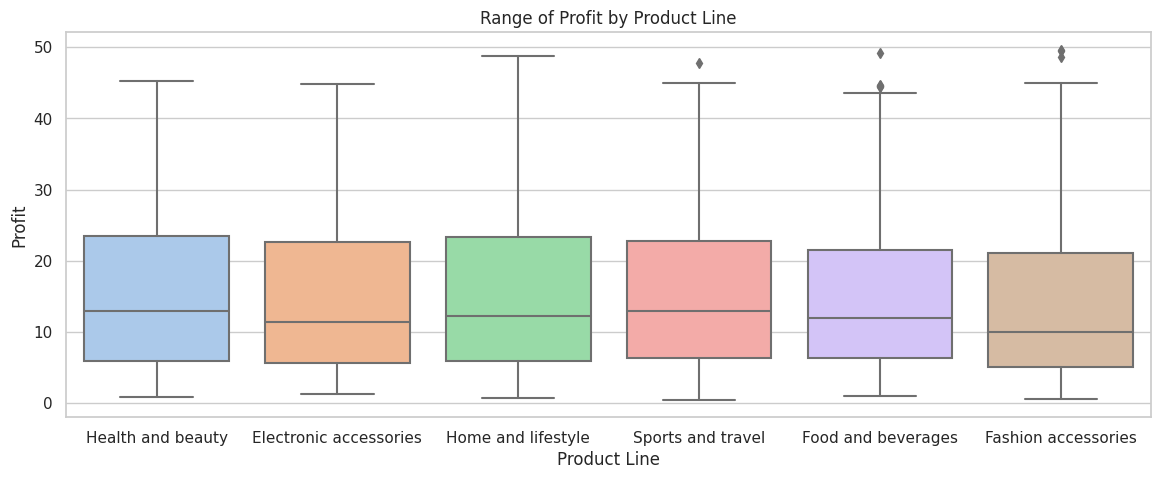

In [143]:
#profit by product line
data['Profit'] = data['Total'] - data['cogs']

plt.figure(figsize=(14, 5))
sns.boxplot(x='Product_line', y='Profit', data=data)
plt.title('Range of Profit by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Profit')

plt.show()

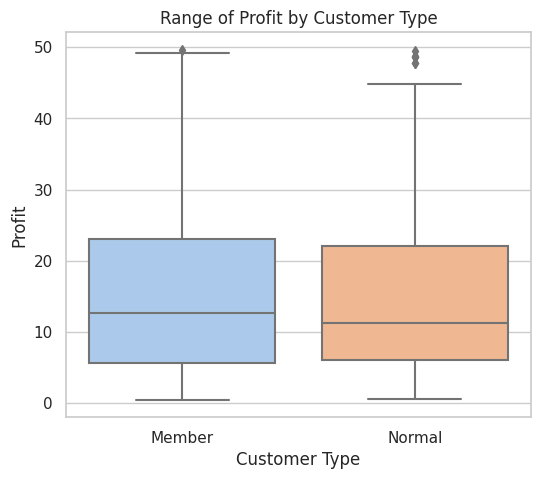

In [135]:
# Create boxplots to show the range of profit by customer type
plt.figure(figsize=(6, 5))
sns.boxplot(x='Customer_type', y='Profit', data=data)
plt.title('Range of Profit by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Profit')

plt.show()


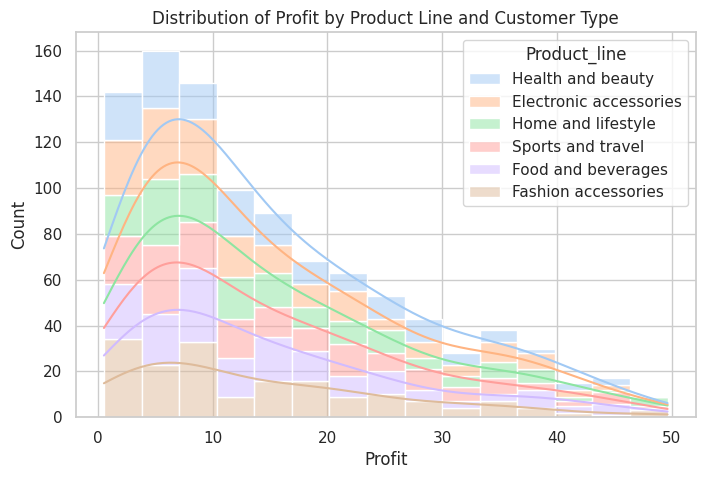

In [134]:
# Create histograms to show the distribution of profit by product line and customer type
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Profit', hue='Product_line', multiple='stack', kde=True)
plt.title('Distribution of Profit by Product Line and Customer Type')
plt.xlabel('Profit')
plt.ylabel('Count')

plt.show()

Correlation coefficient between Unit price , Gross income & Tax: 0.9999999999999996


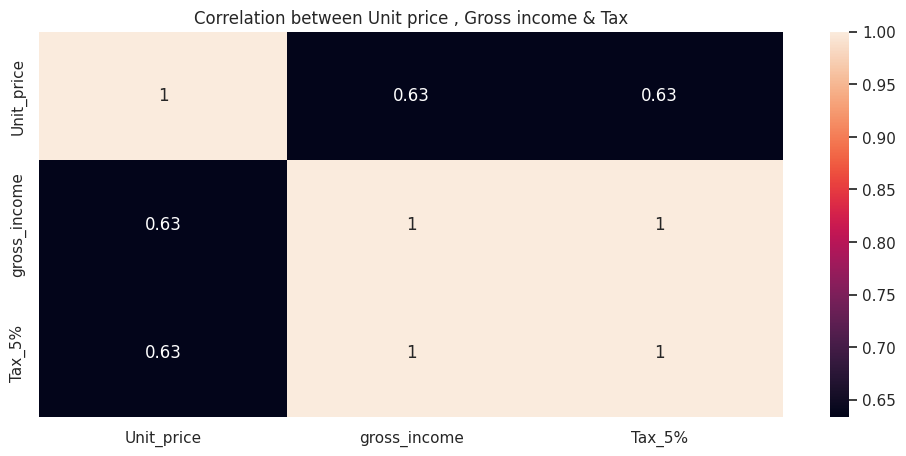

In [144]:
# Calculate correlation for unit price gross income, tax 
corr_matrix = data[['Unit_price', 'gross_income', 'Tax_5%']].corr()
print('Correlation coefficient between Unit price , Gross income & Tax:', corr)

plt.figure(figsize=(12,5))
#sns.set_theme(style="whitegrid", palette="pastel")
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation between Unit price , Gross income & Tax')

plt.show()